<a href="https://colab.research.google.com/github/OziomaEunice/Sentiment_GPT/blob/develop3/LLaMA_SentimentAnalysis_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LLaMA For Sentiment Analysis (IMDb)**

## **Huggingface Login**

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

## **Installing Bitsandbytes, Transformers, Accelerate, Tensorboard and Peft Libraries for LLaMA**

In [ ]:
# install bitsandbytes library for its low usage of memory and prevent the system from crashing.
# install other libraries

#! pip install bitsandbytes==0.39.0
#! pip install bitsandbytes==0.38.1
# ! pip install git+https://github.com/TimDettmers/bitsandbytes.git
! pip uninstall bitsandbytes
! pip install bitsandbytes==0.41.1
! pip install -q -U "torch==2.0.0" tensorboard
! pip install --upgrade transformers accelerate
! pip install dataset trl
! pip install -q -U git+https://github.com/huggingface/peft.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
! pip show bitsandbytes

Name: bitsandbytes
Version: 0.41.1
Summary: k-bit optimizers and matrix multiplication routines.
Home-page: https://github.com/TimDettmers/bitsandbytes
Author: Tim Dettmers
Author-email: dettmers@cs.washington.edu
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
# ! pip uninstall bitsandbytes
# ! pip install bitsandbytes==0.41.1
# # ! pip install bitsandbytes==0.39.0
# ! pip install bitsandbytes==0.38.1

## **Importing Libraries**

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!apt-get update
!apt-get install cuda-toolkit-11-8
import os
os.environ["LD_LIBRARY_PATH"] += ":" + "/usr/local/cuda-11/lib64"
os.environ["LD_LIBRARY_PATH"] += ":" + "/usr/local/cuda-11.8/lib64"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,076 kB]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,843 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main 

In [ ]:
# !rm -r /usr/local/cuda
# !rm -r /usr/local/cuda-12.2
# ! rm -r /usr/local/cuda-12
# !rm -r /usr/local/cuda-11

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from tqdm import tqdm
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import transformers
import bitsandbytes as bnb
from datasets import Dataset
from peft import LoraConfig, PeftConfig, AutoPeftModelForCausalLM
from trl import SFTTrainer, setup_chat_format
from transformers import (AutoModelForCausalLM,
                          AutoTokenizer,
                          BitsAndBytesConfig,
                          TrainingArguments,
                          pipeline,
                          logging)
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay)
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# import tensorboard
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# Download the stopwords dataset
nltk.download('stopwords')

# Download wordnet dataset
nltk.download('wordnet')

# Download punkt dataset
nltk.download('punkt')

# Get the set of English stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(f"pytorch version {torch.__version__}")

pytorch version 2.0.0+cu117


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"working on {device}")

working on cuda:0


## **Loading IMDb Dataset**

In [ ]:
# since dataset is imported to my Google Colab (which will remain in here temporary)
# read excel file
df = pd.read_excel('/content/IMDB_Dataset.xlsx') # for IMDb dataset

## **Preprocessing Dataset**

### **Cleaning Dataset**

In [ ]:
# clean (preprocess) the IMDb dataset
def cleanData1(review, min_word_length = 3):
  review = review.lower()
  review = re.sub(r'@[A-Za-z0-9]+', "", review) # this informs Python the the mentions in text must be substituted with an empty string
  review = re.sub(r'#', "", review) # removing #
  review = re.sub(r'RT[\s]+', "", review) # removing retweets
  review = re.sub(r'https?:\/\/\S+', "", review) # removing links
  review = ' '.join(word for word in review.split() if len(word) >= min_word_length and word not in stop_words) # Remove short words

  punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
  for p in punctuations:
      review = review.replace(p,'') #Removing punctuations

  # Lemmatize the words
  words = nltk.word_tokenize(review)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  review = ' '.join(lemmatized_words)

  return review

In [ ]:
## Apply the cleanData function to all text columns in the dataframe
df = df.applymap(lambda x: cleanData1(x) if isinstance(x, str) else x)

## **Splitting into Training and Testing**

**Credit to https://www.kaggle.com/code/lucamassaron/fine-tune-llama-2-for-sentiment-analysis on Kaggle**

In [ ]:
# split the dataset into training and testing sets,
# with 50% for training and 50% for testing

x_train = list()
x_test = list()

for sentiment in ["positive", "negative"]:
    train, test = train_test_split(df[df.sentiment==sentiment],
                                   train_size = 0.5,
                                   test_size = 0.5,
                                   random_state = 42)

    x_train.append(train)
    x_test.append(test)

In [ ]:
# shuffle the training data in a replicable order => random_state=10
x_train = pd.concat(x_train, ignore_index=True).sample(frac=1, random_state=10)
x_test = pd.concat(x_test)

# for evaluation
eval_idx = [idx for idx in df.index if idx not in list(train.index) + list(test.index)]
x_eval = df[df.index.isin(eval_idx)]
x_eval = (x_eval
          .groupby('sentiment', group_keys=False)
          .apply(lambda x: x.sample(n=50, random_state=10, replace=True)))

x_train = x_train.reset_index(drop=True)

In [ ]:
# generate prompt for LLaMA
def generate_prompt(data_point):
    return f"""
            Analyze the sentiment of the reviews enclosed in square brackets,
            determine if it is positive, neutral, or negative, and return the answer as
            the corresponding sentiment label "positive" or "neutral" or "negative".

            [{data_point["review"]}] = {data_point["sentiment"]}
            """.strip()

def generate_test_prompt(data_point):
    return f"""
            Analyze the sentiment of the news headline enclosed in square brackets,
            determine if it is positive, neutral, or negative, and return the answer as
            the corresponding sentiment label "positive" or "neutral" or "negative".

            [{data_point["review"]}] = """.strip()

In [ ]:
# For Twitter
x_train = pd.DataFrame(x_train.apply(generate_prompt, axis=1), columns=["review"])
x_eval = pd.DataFrame(x_eval.apply(generate_prompt, axis=1), columns=["review"])

# For testing Twitter
y_true = x_test.sentiment
x_test = pd.DataFrame(x_test.apply(generate_test_prompt, axis=1), columns=["review"])

In [ ]:
# wrap the train data by the class from Hugging Face (https://huggingface.co/docs/datasets/index)
train_data = Dataset.from_pandas(x_train)
eval_data = Dataset.from_pandas(x_eval)

### **Creating a function to evaluate the results from the fine-tuned sentiment model**

In [ ]:
def evaluate(y_true, y_pred):
    labels = ['positive', 'neutral', 'negative']
    mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
    def map_func(x):
        return mapping.get(x, 2)

    y_true = np.vectorize(map_func)(y_true)
    y_pred = np.vectorize(map_func)(y_pred)


    print('==============================================')
    print('\nClassification Report For IMDb Dataset\n')
    print('==============================================')

    # Calculate accuracy
    accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
    accuracy_perc = accuracy * 100

    print(f"Accuracy on IMDb dataset: {accuracy_perc:.2f}%")
    print('---------------------------\n')

    # Generate accuracy report
    unique_labels = set(y_true)  # Get unique labels

    for label in unique_labels:
        label_indices = [i for i in range(len(y_true))
                         if y_true[i] == label]
        label_y_true = [y_true[i] for i in label_indices]
        label_y_pred = [y_pred[i] for i in label_indices]
        accuracy = accuracy_score(label_y_true, label_y_pred)
        accuracy_perc = accuracy * 100
        print(f'Accuracy for label {label}: {accuracy:.2f}%')

    # Generate classification report
    class_report = classification_report(y_true=y_true, y_pred=y_pred)
    #print('\nClassification Report:')
    print(class_report)

    # Generate confusion matrix
    style.use('classic')
    # conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[-1, 0, 1])
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    # Display confusion matrix for Twitter
    display_cm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['positive', 'neutral', 'negative'])
    display_cm.plot(cmap='viridis', values_format='d')

    plt.title('Confusion Matrix (IMDb)')
    plt.show()
    # print('\nConfusion Matrix:')
    # print(conf_matrix)

## **Downloading LLaMA model**

In [ ]:
# use standard model and tokeniser from the huggingface transformer

model_name = "meta-llama/Llama-2-7b-hf" # llama model (using 7b parameter)

compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=True,
)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map=device,
    torch_dtype=compute_dtype,
    quantization_config=bnb_config,
)

model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                         )
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

model, tokenizer = setup_chat_format(model, tokenizer)

config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

You are calling `save_pretrained` to a 4-bit converted model, but your `bitsandbytes` version doesn't support it. If you want to save 4-bit models, make sure to have `bitsandbytes>=0.41.3` installed.


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

### **No Fine-tuning**

In [ ]:
def predict(test, model, tokenizer):
    y_pred = []
    for i in tqdm(range(len(x_test))):
        prompt = x_test.iloc[i]["review"]
        pipe = pipeline(task="text-generation",
                        model=model,
                        tokenizer=tokenizer,
                        max_new_tokens = 1,
                        do_sample=False,  # Use greedy decoding strategy
                        # temperature = 0.0,
                       )
        result = pipe(prompt)
        answer = result[0]['generated_text'].split("=")[-1]
        if "positive" in answer:
            y_pred.append("positive")
        elif "negative" in answer:
            y_pred.append("negative")
        else:
            y_pred.append("neutral")

    return y_pred

In [ ]:
y_pred = predict(test, model, tokenizer)

100%|██████████| 25000/25000 [53:08<00:00,  7.84it/s]



Classification Report For IMDb Dataset

Accuracy on IMDb dataset: 0.69%
---------------------------

Accuracy for label 1: 0.01%
Accuracy for label -1: 0.00%
              precision    recall  f1-score   support

          -1       1.00      0.00      0.00     12500
           0       0.00      0.00      0.00         0
           1       0.88      0.01      0.03     12500

    accuracy                           0.01     25000
   macro avg       0.63      0.00      0.01     25000
weighted avg       0.94      0.01      0.01     25000



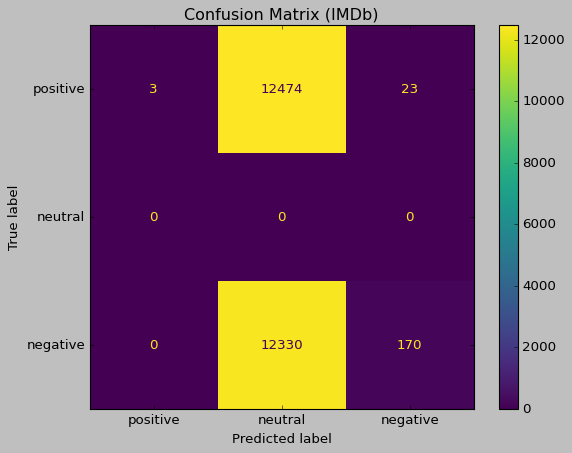

In [ ]:
evaluate(y_true, y_pred)

### **Fine-tuning**

In [ ]:
# created a directory where the training logs
# and checkpoints will be saved.
output_dir = "trained_weights"

In [ ]:
# using PEFT
peft_config = LoraConfig(
        lora_alpha=16,
        lora_dropout=0.1,
        r=64,
        bias="none",
        target_modules="all-linear",
        task_type="CAUSAL_LM",
)

In [ ]:
# training arguments
training_arguments = TrainingArguments(
    output_dir=output_dir,                    # directory to save and repository id
    num_train_epochs=3,                       # number of training epochs
    per_device_train_batch_size=1,            # batch size per device during training
    gradient_accumulation_steps=8,            # number of steps before performing a backward/update pass
    gradient_checkpointing=True,              # use gradient checkpointing to save memory
    optim="paged_adamw_32bit",
    save_steps=0,
    logging_steps=25,                         # log every 10 steps
    learning_rate=2e-4,                       # learning rate, based on QLoRA paper
    weight_decay=0.001,
    fp16=True,
    bf16=False,
    max_grad_norm=0.3,                        # max gradient norm based on QLoRA paper
    max_steps=-1,
    warmup_ratio=0.03,                        # warmup ratio based on QLoRA paper
    group_by_length=True,
    lr_scheduler_type="cosine",               # use cosine learning rate scheduler
    report_to="tensorboard",                  # report metrics to tensorboard
    evaluation_strategy="epoch"               # save checkpoint every epoch
)

In [ ]:
# using SFTTrainer
trainer = SFTTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_data,
    eval_dataset=eval_data,
    peft_config=peft_config,
    dataset_text_field="review",
    tokenizer=tokenizer,
    max_seq_length=1024,
    packing=False,
    dataset_kwargs={
        "add_special_tokens": False,
        "append_concat_token": False,
    }
)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

In [ ]:
# train model
trainer.train()

Epoch,Training Loss,Validation Loss
1,2.970800,2.903843
2,2.711400,2.773255
3,2.528900,2.744217


TrainOutput(global_step=9375, training_loss=2.7693388826497394, metrics={'train_runtime': 50626.7732, 'train_samples_per_second': 1.481, 'train_steps_per_second': 0.185, 'total_flos': 7.564022993745838e+17, 'train_loss': 2.7693388826497394, 'epoch': 3.0})

In [ ]:
# save the trained model and tokeniser
trainer.save_model()
tokenizer.save_pretrained(output_dir)

('trained_weights/tokenizer_config.json',
 'trained_weights/special_tokens_map.json',
 'trained_weights/tokenizer.model',
 'trained_weights/added_tokens.json',
 'trained_weights/tokenizer.json')

In [ ]:
# load result in the TensorBoard extension and start it
%load_ext tensorboard
%tensorboard --logdir logs/runs

##### **Remove previous model and clean up the memory from various objects that won't be used anymore**

In [ ]:
import gc

del [model, tokenizer, peft_config, trainer, train_data, bnb_config, training_arguments]
del [df, x_train, x_eval]
del [TrainingArguments, SFTTrainer, LoraConfig, BitsAndBytesConfig]

In [ ]:
for _ in range(100):
    torch.cuda.empty_cache()
    gc.collect()

##### **Now proceed to merge the weights and use it for testing purposes**

In [ ]:
finetuned_model = "./trained_weights/"
compute_dtype = getattr(torch, "float16")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf")


model = AutoPeftModelForCausalLM.from_pretrained(
     finetuned_model,
     torch_dtype=compute_dtype,
     return_dict=False,
     low_cpu_mem_usage=True,
     device_map=device,
)

merged_model = model.merge_and_unload()
merged_model.save_pretrained("./merged_model",safe_serialization=True, max_shard_size="2GB")
tokenizer.save_pretrained("./merged_model")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


('./merged_model/tokenizer_config.json',
 './merged_model/special_tokens_map.json',
 './merged_model/tokenizer.model',
 './merged_model/added_tokens.json',
 './merged_model/tokenizer.json')

### **Testing the Fine-tuned model**

In [ ]:
y_pred = predict(test, merged_model, tokenizer)

100%|██████████| 25000/25000 [26:43<00:00, 15.59it/s]



Classification Report For IMDb Dataset

Accuracy on IMDb dataset: 95.77%
---------------------------

Accuracy for label 1: 0.96%
Accuracy for label -1: 0.96%
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96     12500
           1       0.96      0.96      0.96     12500

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

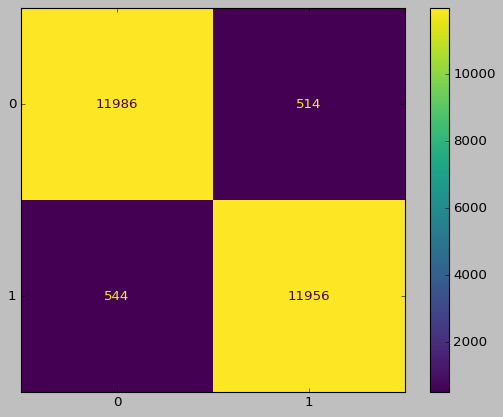

In [ ]:
evaluate(y_true, y_pred)